In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

print(data.shape)
print(target.shape)

(324, 2500)
(324,)


In [2]:
import collections
print(collections.Counter(target))

Counter({1: 127, 2: 107, 0: 90})


In [3]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2)

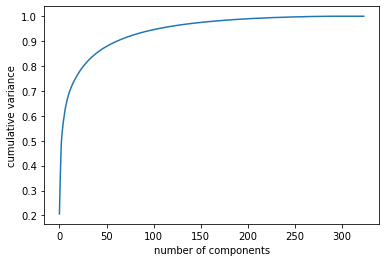

In [4]:
#how to decide n_component in pca

from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data)

from matplotlib import pyplot as plt
import numpy as np
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative variance')
plt.show()

In [5]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca=PCA(n_components=150,whiten=True,random_state=42)
svc=SVC(kernel='rbf')

model=make_pipeline(pca,svc)

In [6]:
model.fit(train_data,train_target)

Pipeline(steps=[('pca', PCA(n_components=150, random_state=42, whiten=True)),
                ('svc', SVC())])

In [7]:
predicted_target=model.predict(test_data)

from sklearn.metrics import accuracy_score
acc=accuracy_score(test_target,predicted_target)
print("accuracy:",acc)    

accuracy: 0.8615384615384616


In [9]:
import joblib
joblib.dump(model,'SVM-FaceRec.sav')

['SVM-FaceRec.sav']